<a href="https://www.kaggle.com/code/alicjapiaskowska/e-commerce-sales?scriptVersionId=173405298" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecommerce-data/data.csv


# **Importing necessary libraries**

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

import missingno as msno
import pandas_profiling

import gc
import datetime

%matplotlib inline
color = sns.color_palette()

# **Getting information about dataset. Exploring data.**

In [3]:
df = pd.read_csv('../input/ecommerce-data/data.csv', encoding = 'ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
# check missing values for each column 
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

In [6]:
#% of missing values for each feature
missing_percentage = df.isnull().sum() / df.shape[0] * 100
missing_percentage

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

# **Manipulating data.**

In [7]:
# change the format of data- String to Timestamp format
df.InvoiceDate = pd.to_datetime(df.InvoiceDate, format='%m/%d/%Y %H:%M')
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
# data frame without missing values
df_new = df.dropna()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [9]:
df_new.isnull().sum().sort_values(ascending=False)

Country        0
CustomerID     0
UnitPrice      0
InvoiceDate    0
Quantity       0
Description    0
StockCode      0
InvoiceNo      0
dtype: int64

In [10]:
df_new.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,406829.00,406829.00,406829.00
mean,12.06,3.46,15287.69
std,248.69,69.32,1713.60
min,-80995.00,0.00,12346.00
25%,2.00,1.25,13953.00
50%,5.00,1.95,15152.00
75%,12.00,3.75,16791.00
max,80995.00,38970.00,18287.00


In [11]:
df_new['Country'].value_counts()

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [12]:
len(df_new['Country'].unique().tolist())

37

In [13]:
#Remove Quantity with negative values
df_new = df_new[df_new.Quantity > 0]
df_new.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,397924.00,397924.00,397924.00
mean,13.02,3.12,15294.32
std,180.42,22.10,1713.17
min,1.00,0.00,12346.00
25%,2.00,1.25,13969.00
50%,6.00,1.95,15159.00
75%,12.00,3.75,16795.00
max,80995.00,8142.75,18287.00


# **Making visualizations**

In [14]:
#orders made by the customers
orders=df_new.groupby(by=['CustomerID','Country'], sort=['InvoiceNo'], as_index=False)['InvoiceNo'].count()
orders.sort_values('InvoiceNo', ascending=False)

,CustomerID,Country,InvoiceNo
4019,17841.0,United Kingdom,7847
1888,14911.0,EIRE,5677
1298,14096.0,United Kingdom,5111
334,12748.0,United Kingdom,4596
1670,14606.0,United Kingdom,2700
...,...,...,...
605,13135.0,United Kingdom,1
643,13185.0,United Kingdom,1
3969,17763.0,United Kingdom,1
3962,17752.0,United Kingdom,1


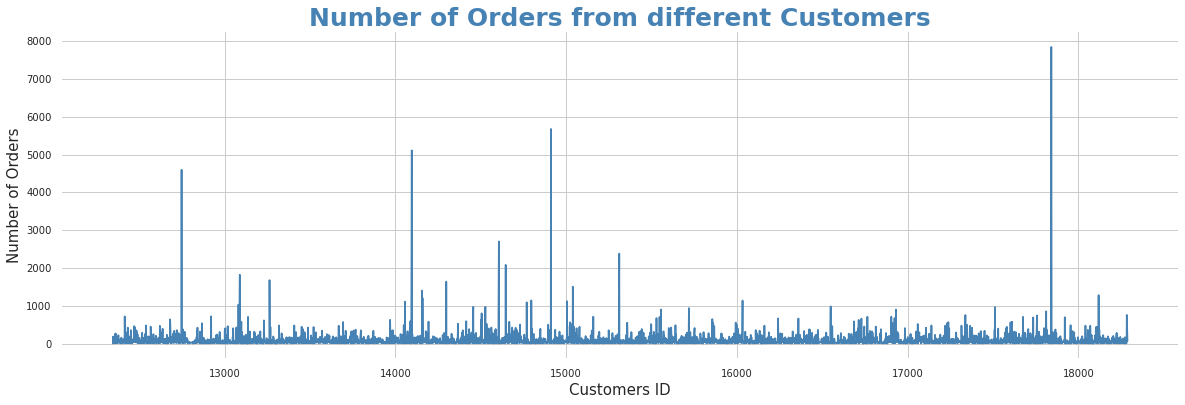

In [15]:
orders = df_new.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()

plt.subplots(figsize=(20,6))
plt.plot(orders.CustomerID, orders.InvoiceNo,color ='steelblue')
plt.grid(True)
plt.xlabel('Customers ID', fontsize=15, fontname="Times New Roman")
plt.ylabel('Number of Orders',fontsize=15, fontname="Times New Roman")
plt.title('Number of Orders from different Customers', fontsize=25, color ='steelblue', fontname="Times New Roman",fontweight="bold")
plt.show()

In [16]:
#money spent by different customers
df_new['MoneySpent'] = df_new['Quantity'] * df_new['UnitPrice']
money_spent = df_new.groupby(by=['CustomerID','Country'], as_index=False)['MoneySpent'].sum()
money_spent.sort_values(by='MoneySpent', ascending=False)


,CustomerID,Country,MoneySpent
1698,14646.0,Netherlands,280206.02
4210,18102.0,United Kingdom,259657.30
3737,17450.0,United Kingdom,194550.79
3017,16446.0,United Kingdom,168472.50
1888,14911.0,EIRE,143825.06
...,...,...,...
4107,17956.0,United Kingdom,12.75
3023,16454.0,United Kingdom,6.90
1802,14792.0,United Kingdom,6.20
3226,16738.0,United Kingdom,3.75


In [17]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
 8   MoneySpent   397924 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB


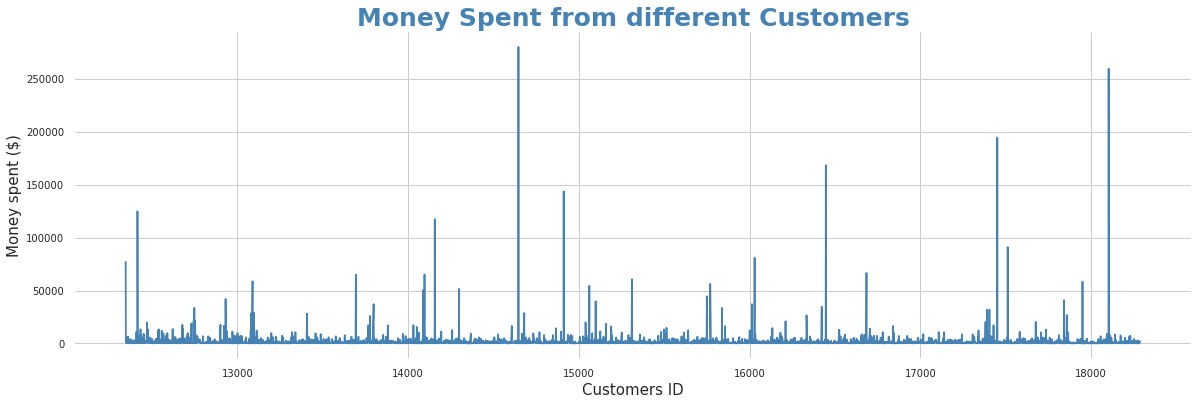

In [18]:
money_spent = df_new.groupby(by=['CustomerID','Country'], as_index=False)['MoneySpent'].sum()

plt.subplots(figsize=(20,6))
plt.plot(money_spent.CustomerID, money_spent.MoneySpent,color ='steelblue')
plt.grid(True)
plt.xlabel('Customers ID', fontsize=15, fontname="Times New Roman")
plt.ylabel('Money spent ($)',fontsize=15, fontname="Times New Roman")
plt.title('Money Spent from different Customers', fontsize=25, color ='steelblue', fontname="Times New Roman",fontweight="bold")
plt.show()

In [19]:
#money spent by customers from each country
money_spent_country = df_new.groupby(by=['Country'], as_index=False)['MoneySpent'].sum()
money_spent_country.sort_values(by='MoneySpent', ascending=False)


,Country,MoneySpent
35,United Kingdom,7.308392e+06
23,Netherlands,2.854463e+05
10,EIRE,2.655459e+05
14,Germany,2.288671e+05
13,France,2.090240e+05
0,Australia,1.385213e+05
30,Spain,6.157711e+04
32,Switzerland,5.644395e+04
3,Belgium,4.119634e+04
31,Sweden,3.837833e+04


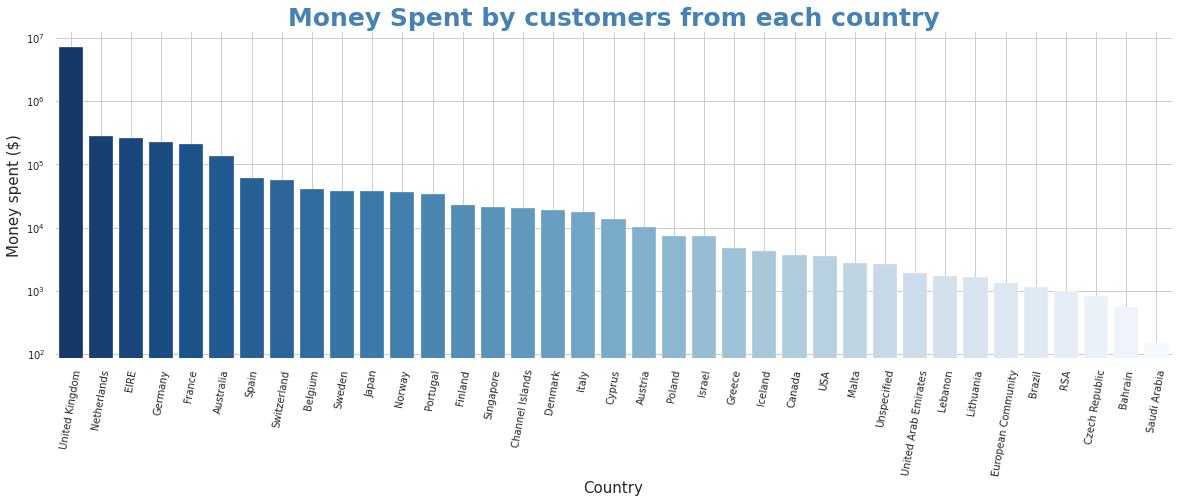

In [20]:
money_spent_country = money_spent.groupby(by=['Country'], as_index=False)['MoneySpent'].sum().sort_values(by='MoneySpent', ascending=False)
plt.subplots(figsize=(20,6))
sns.barplot(money_spent_country.Country, money_spent_country.MoneySpent,palette="Blues_r")
plt.grid(True)
plt.xlabel('Country', fontsize=15, fontname="Times New Roman")
plt.ylabel('Money spent ($)',fontsize=15, fontname="Times New Roman")
plt.title('Money Spent by customers from each country', fontsize=25, color ='steelblue', fontname="Times New Roman",fontweight="bold")
plt.xticks(rotation=80)
plt.yscale("log")
plt.show()

In [21]:
#amount of transactions by each country
transaction_country = df_new.groupby(by=['Country'], as_index=False)['InvoiceNo'].count()
transaction_country.sort_values(by='InvoiceNo', ascending=False)


,Country,InvoiceNo
35,United Kingdom,354345
14,Germany,9042
13,France,8342
10,EIRE,7238
30,Spain,2485
23,Netherlands,2363
3,Belgium,2031
32,Switzerland,1842
26,Portugal,1462
0,Australia,1185


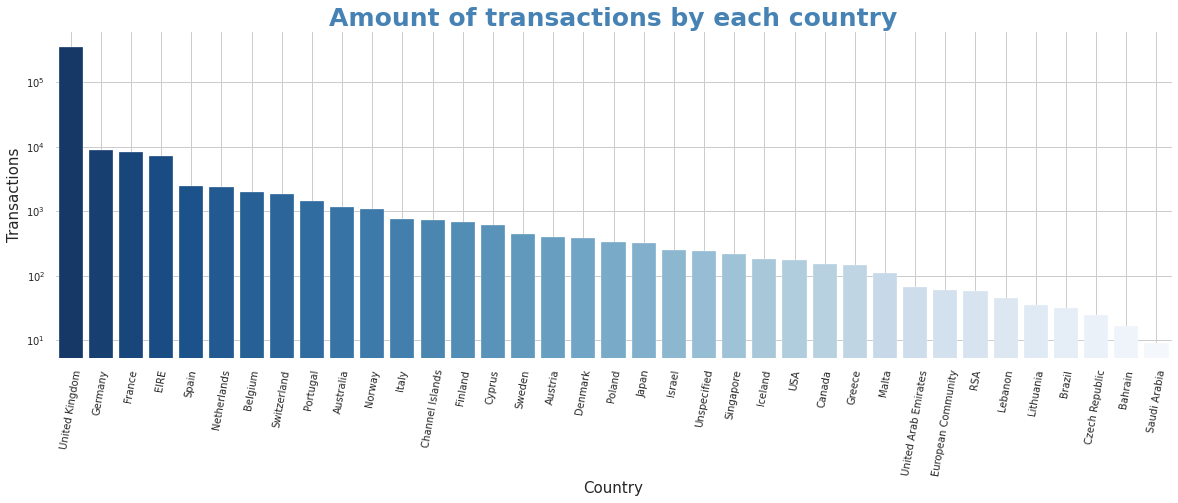

In [22]:
transaction_country = df_new.groupby(by=['Country'], as_index=False)['InvoiceNo'].count().sort_values(by='InvoiceNo', ascending=False)
plt.subplots(figsize=(20,6))
sns.barplot(transaction_country.Country, transaction_country.InvoiceNo,palette="Blues_r")
plt.grid(True)
plt.xlabel('Country', fontsize=15, fontname="Times New Roman")
plt.ylabel('Transactions',fontsize=15, fontname="Times New Roman")
plt.title('Amount of transactions by each country', fontsize=25, color ='steelblue', fontname="Times New Roman",fontweight="bold")
plt.xticks(rotation=80)
plt.yscale("log")
plt.show()

In [23]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
 8   MoneySpent   397924 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB


In [24]:
df_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,MoneySpent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


Sales per day/month

In [25]:
df_new.InvoiceDate.describe()

count                  397924
unique                  17286
top       2011-11-14 15:27:00
freq                      542
first     2010-12-01 08:26:00
last      2011-12-09 12:50:00
Name: InvoiceDate, dtype: object

In [26]:
df_new["Year"] = df_new.InvoiceDate.dt.year
df_new["Quarter"] = df_new.InvoiceDate.dt.quarter
df_new["Month"] = df_new.InvoiceDate.dt.month
df_new["Week"] = df_new.InvoiceDate.dt.week
df_new["Weekday"] = df_new.InvoiceDate.dt.weekday
df_new["Day"] = df_new.InvoiceDate.dt.day
df_new["Dayofyear"] = df_new.InvoiceDate.dt.dayofyear
df_new["Date"] = pd.to_datetime(df_new[['Year', 'Month', 'Day']])
df_new.insert(loc = 10 , column='Year_month', value=df_new['InvoiceDate'].map(lambda x: 100*x.year + x.month))

df_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,MoneySpent,Year,Year_month,Quarter,Month,Week,Weekday,Day,Dayofyear,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,201012,4,12,48,2,1,335,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,201012,4,12,48,2,1,335,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,201012,4,12,48,2,1,335,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,201012,4,12,48,2,1,335,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,201012,4,12,48,2,1,335,2010-12-01


In [27]:
monthly_sales = df_new.groupby(by=['Year_month'], as_index=False)['MoneySpent'].sum()
print(monthly_sales)

    Year_month   MoneySpent
0       201012   572713.890
1       201101   569445.040
2       201102   447137.350
3       201103   595500.760
4       201104   469200.361
5       201105   678594.560
6       201106   661213.690
7       201107   600091.011
8       201108   645343.900
9       201109   952838.382
10      201110  1039318.790
11      201111  1161817.380
12      201112   518192.790


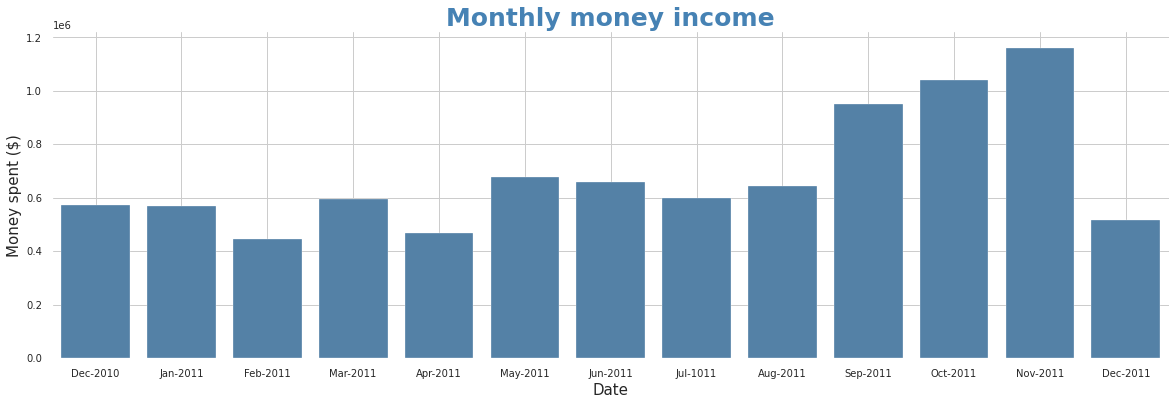

In [28]:
positions = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)
yearmonth = ["Dec-2010", "Jan-2011", "Feb-2011", "Mar-2011", "Apr-2011", "May-2011",
             "Jun-2011", "Jul-1011", "Aug-2011", "Sep-2011", "Oct-2011", "Nov-2011", 
             "Dec-2011"]

monthly_sales = df_new.groupby(by=['Year_month'], as_index=False)['MoneySpent'].sum()
plt.subplots(figsize=(20,6))
sns.barplot(monthly_sales.Year_month, monthly_sales.MoneySpent,color="steelblue")
plt.grid(True)
plt.xlabel('Date', fontsize=15, fontname="Times New Roman")
plt.ylabel('Money spent ($)',fontsize=15, fontname="Times New Roman")
plt.title('Monthly money income', fontsize=25, color ='steelblue', fontname="Times New Roman",fontweight="bold")
plt.xticks(positions, yearmonth)

plt.show()